In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Scenario 1

Playing with:
- number of layers
- number of neurons per layer
- activation functions
- batch size
- number of epochs

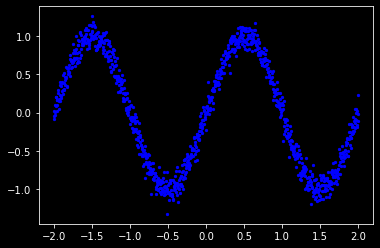

In [2]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 50
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

# Create model
model = Sequential([
    Input(shape=X.shape[1]),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear'),
])

# Compile model
model.compile(
    optimizer='adam',
    loss='mse'
)

# Display model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 481us/step


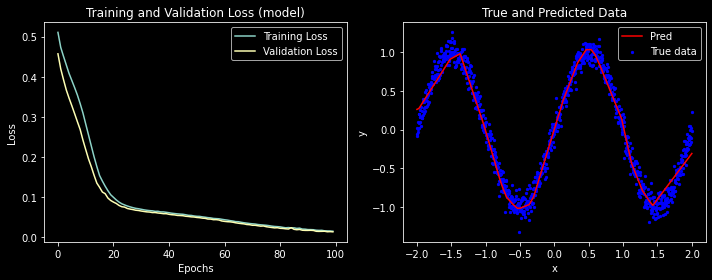

In [11]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0,
)

# Get predictions
y_pred = model.predict(X)[:,0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss (model)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: True vs Predicted Data
axes[1].scatter(x, y, c='b', s=5, label="True data")
axes[1].plot(x, y_pred, 'r', label="Pred")
axes[1].set_title('True and Predicted Data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.tight_layout()
plt.show()

# Scenario 2

### Scaling labels

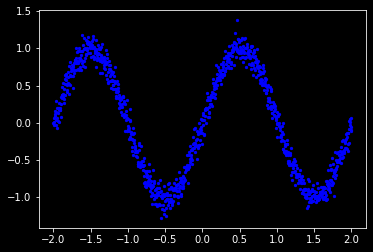

In [12]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 30
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().max() * 2
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [16]:
# Create model
model = Sequential([
    Input(shape=X.shape[1]),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# Compile model
model.compile(
    optimizer='adam',
    loss='mse'
)

# Display model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 515us/step


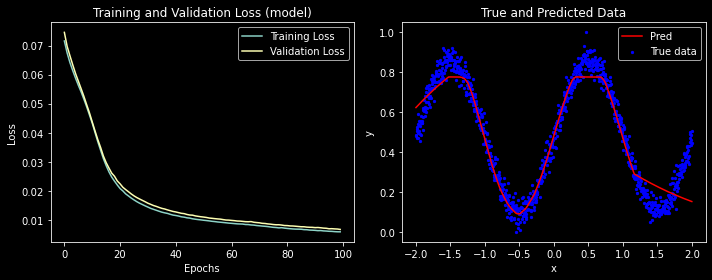

In [17]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0,
)

# Get predictions
y_pred = model.predict(X)[:,0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss (model)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: True vs Predicted Data
axes[1].scatter(x, y, c='b', s=5, label="True data")
axes[1].plot(x, y_pred, 'r', label="Pred")
axes[1].set_title('True and Predicted Data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.tight_layout()
plt.show()

# Scenario 3

### Scaling labels and features

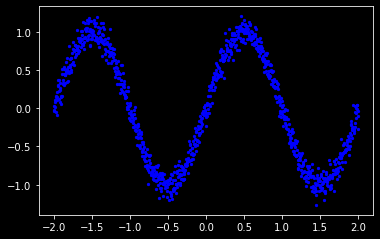

In [18]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 30
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().max() * 2
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [21]:
# Create model
model = Sequential([
    Input(shape=X.shape[1]),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='relu'),
])

# Compile model
model.compile(
    optimizer='adam',
    loss='mse'
)

# Display model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                20        
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 547us/step


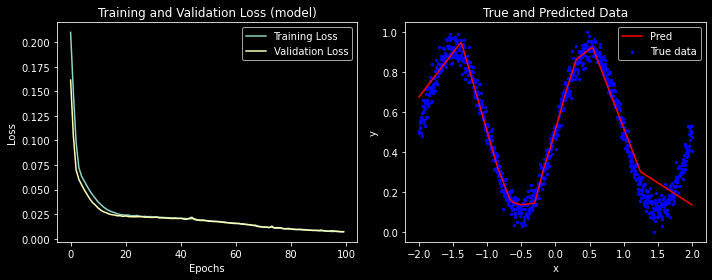

In [22]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0,
)

# Get predictions
y_pred = model.predict(X)[:,0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss (model)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: True vs Predicted Data
axes[1].scatter(x, y, c='b', s=5, label="True data")
axes[1].plot(x, y_pred, 'r', label="Pred")
axes[1].set_title('True and Predicted Data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.tight_layout()
plt.show()

# Scenario 4

### Change learning rate and optimizer

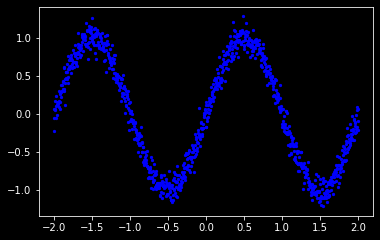

In [29]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 30
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().max() * 2
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [33]:
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Input(shape=X.shape[1]),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='relu'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='mse'
)

# Display model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                20        
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 10)                110       
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 520us/step


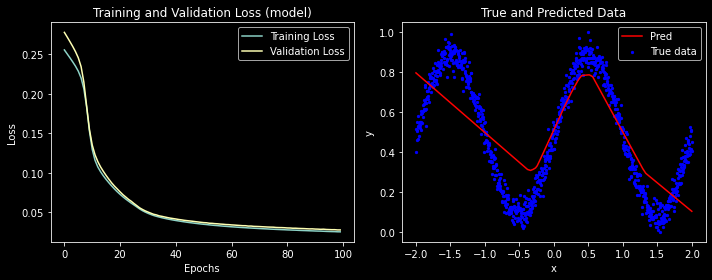

In [34]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0,
)

# Get predictions
y_pred = model.predict(X)[:,0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss (model)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: True vs Predicted Data
axes[1].scatter(x, y, c='b', s=5, label="True data")
axes[1].plot(x, y_pred, 'r', label="Pred")
axes[1].set_title('True and Predicted Data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.tight_layout()
plt.show()

# Scenario 5

### Including dropout

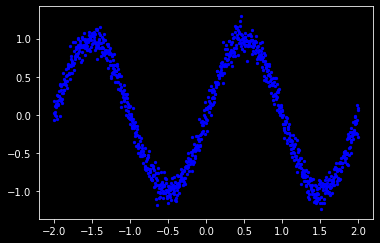

In [35]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 30
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().max() * 2
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [106]:
from tensorflow.keras.optimizers import Adam

dropout_rate = 0.1

# Create model
model = Sequential([
    Input(shape=X.shape[1]),
    
    Dense(20, activation='relu'),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    
    Dense(1, activation='sigmoid'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='mse'
)

# Display model summary
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 20)                40        
                                                                 
 dropout_12 (Dropout)        (None, 20)                0         
                                                                 
 dense_120 (Dense)           (None, 20)                420       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_121 (Dense)           (None, 20)                420       
                                                                 
 dense_122 (Dense)           (None, 1)                 21        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable

32/32 [==============================] - 0s 547us/step


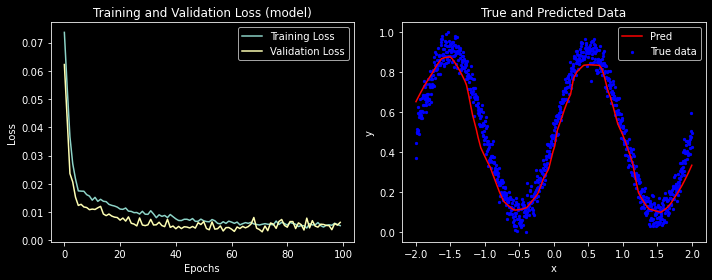

In [107]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=0,
)

# Get predictions
y_pred = model.predict(X)[:,0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss (model)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: True vs Predicted Data
axes[1].scatter(x, y, c='b', s=5, label="True data")
axes[1].plot(x, y_pred, 'r', label="Pred")
axes[1].set_title('True and Predicted Data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.tight_layout()
plt.show()

# Scenario 6

### Add batch normalization

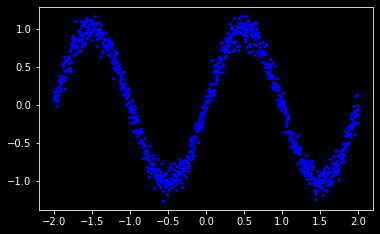

In [108]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 30
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().max() * 2
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

In [109]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [111]:
from tensorflow.keras.optimizers import Adam

dropout_rate = 0.1

# Create model
model = Sequential([
    Input(shape=X.shape[1]),
    
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    
    Dense(1, activation='sigmoid'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='mse'
)

# Display model summary
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 20)                40        
                                                                 
 batch_normalization_4 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dropout_16 (Dropout)        (None, 20)                0         
                                                                 
 dense_128 (Dense)           (None, 20)                420       
                                                                 
 batch_normalization_5 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dropout_17 (Dropout)        (None, 20)              

32/32 [==============================] - 0s 547us/step


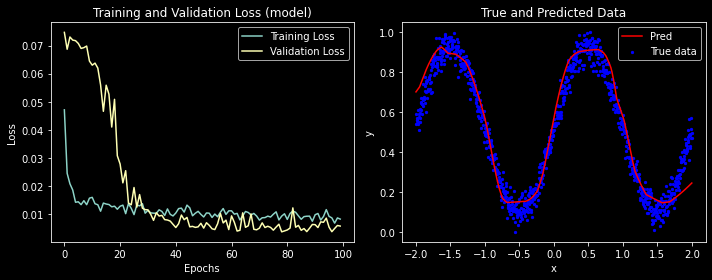

In [112]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=0,
)

# Get predictions
y_pred = model.predict(X)[:,0]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss (model)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right subplot: True vs Predicted Data
axes[1].scatter(x, y, c='b', s=5, label="True data")
axes[1].plot(x, y_pred, 'r', label="Pred")
axes[1].set_title('True and Predicted Data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()

plt.tight_layout()
plt.show()